In [1]:
import pandas as pd
Amazon_Reviews=pd.read_csv('Amazon_Reviews.csv')
Amazon_Reviews

,Review,Label
0,Stuning even for the non-gamer: This sound tr...,__label__2
1,The best soundtrack ever to anything.: I'm re...,__label__2
2,Amazing!: This soundtrack is my favorite musi...,__label__2
3,Excellent Soundtrack: I truly like this sound...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After H...",__label__2
...,...,...
194,A Book That Is Worth a Second Look: This book...,__label__2
195,Best game ever: This games makes even amazing...,__label__2
196,Guitar in Absentia: With all due respect to a...,__label__1
197,Stiff and Smells like drying paint: You get w...,__label__1


In [2]:
Amazon_Reviews.shape

(199, 2)

In [3]:
Amazon_Reviews.columns

Index(['Review', 'Label'], dtype='object')

In [4]:
from nltk.corpus import stopwords
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [122]:
import pandas as pd
Amazon_Reviews=pd.read_csv('Amazon_Reviews.csv')
Amazon_Reviews['Label'].replace({'__label__2 ' :1,'__label__1 ' :0})


0      1
1      1
2      1
3      1
4      1
      ..
194    1
195    1
196    0
197    0
198    0
Name: Label, Length: 199, dtype: int64

In [5]:
import pandas as pd
Amazon_Reviews=pd.read_csv('Amazon_Reviews.csv')
from sklearn.model_selection import train_test_split
Amazon_Reviews['Label'].replace({'__label__2 ':1,'__label__1 ':0},inplace=True)
y=Amazon_Reviews['Label']
Amazon_Reviews.drop(columns='Label',axis=1,inplace=True)
X_train,X_test,y_train,y_test=train_test_split(Amazon_Reviews,y,random_state=42,test_size=0.2)

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer= WordNetLemmatizer()
stemmer= PorterStemmer()
                           
def preprocessing(review):
    
    final_tokens=' '
    tokens=tokenizer.tokenize(review)
    #print('Tokens:',tokens)
    Pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    #print('Pure_tokens:',pure_tokens)
    stemmed_tokens=[stemmer.stem(Pure_token) for Pure_token in Pure_tokens]
    
    final_tokens=final_tokens.join(stemmed_tokens)
    
    return final_tokens
preprocessing('I was eating my breakfast when you were playing')
X_train['Cleaned_text']=X_train['Review'].apply(preprocessing)
X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)


C:\Users\Mounika Balireddy\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Mounika Balireddy\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
lemmatizer.lemmatize('countries',pos='n')
stemmer.stem('countries')

'countri'

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(stop_words='english',use_idf=True)

vectorizer.fit(X_train['Cleaned_text'])
X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)
X_train_Tfidf=vectorizer.transform(X_train['Cleaned_text'])

X_test_Tfidf=vectorizer.transform(X_test['Cleaned_text'])



C:\Users\Mounika Balireddy\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

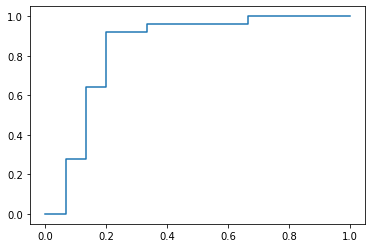

In [123]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt

clf= MultinomialNB().fit(X_train_Tfidf.toarray(),y_train)
#clf.score(X_train_Tfidf.to array(),y_train)

#test_review='That product was its absolute best and i loved using every feature of it'



#preprocessed_test_review

y_pred=clf.predict(X_test_Tfidf.toarray())

confusion_matrix(y_test,y_pred)
y_proba_pred=clf.predict_proba(X_test_Tfidf.toarray())[::,1]
y_proba_pred
fpr,tpr,thresholds=roc_curve(y_test,y_proba_pred)

plt.plot(fpr,tpr)
roc_auc_score(y_test,y_proba_pred)
y_pred

In [10]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)



In [11]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoderExt()

for col in X_train.columns:
    if X_train[col].dtype=='object':
        le.fit(X_train[col])
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])
X_train


C:\Users\Mounika Balireddy\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mounika Balireddy\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Review,Cleaned_text
183,70,81
38,40,153
24,144,96
142,85,119
141,4,38
...,...,...
106,126,12
14,18,14
92,92,116
179,133,159


In [12]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(X_train,y_train)



y_pred=logreg.predict(X_test)

y_pred



C:\Users\Mounika Balireddy\Downloads\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [13]:
import warnings
warnings.filterwarnings('ignore')
comparisons_df=pd.DataFrame({'Actuals':y_test,'Predictions':y_pred})

from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

confusion_matrix(y_test,y_pred)

recall_score(y_test,y_pred)
precision_score(y_test,y_pred)

f1_score(y_test,y_pred)



0.7692307692307693

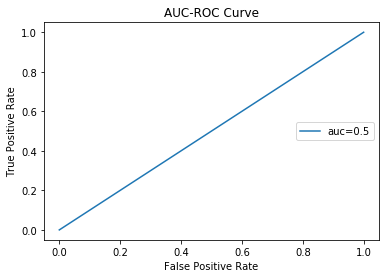

In [16]:
#AUC, ROC curve for logistic regression
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test)[::,1]

y_pred_proba

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba) # the function roc_curve returns three values, the False Positive Rate,True Positive rate
                                                # threshold values it used to calculate the TPR and FPR

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

plt.legend(loc=5)
plt.show()



In [17]:
scores_df=pd.DataFrame({'FPR':fpr,'Thresholds':thresholds})
scores_df

,FPR,Thresholds
0,0.0,1.620388
1,1.0,0.620388


In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree=DecisionTreeClassifier()

hyp_dict={'max_depth':[2,3,6,7],
          'min_samples_split':[2,4,6],
          'min_samples_leaf':[3,4,5],
          'max_leaf_nodes':[4,5,7,9]}

grid_cv=GridSearchCV(dtree,param_grid=hyp_dict,cv=5)
grid_cv.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 6, 7],
                         'max_leaf_nodes': [4, 5, 7, 9],
                         'm

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier()

hyp_dict={'max_depth':[2,3,6,7],
          'min_samples_split':[2,4,6],
          'min_samples_leaf':[3,4,5],
          'max_leaf_nodes':[4,5,7,9],
         'n_estimators': [120]}

grid_cv=GridSearchCV(rfc,param_grid=hyp_dict,cv=5)
grid_cv.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [26]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_cv=RandomizedSearchCV(dtree,param_distributions=hyp_dict,cv=5,n_iter=400)
random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [29]:
y_dtree_predict=grid_cv.predict(X_test)
y_dtree_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
y_dtree_predict=random_cv.predict(X_test)
y_dtree_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)